In [1]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
import cv2
from skimage import img_as_float
import albumentations
import numpy as np
import random

In [2]:
original_set = {
                
                "trainingset":{
                    "images":["./dataset/train/images/"+str(id)+".jpg" for id in range(105)],
                    "labels":["./dataset/train/labels/"+str(id)+".npy" for id in range(105)]
                }, 
                "testingset":{
                    "images":["./dataset/test/images/"+str(id)+".jpg" for id in range(105)],
                    "labels":["./dataset/test/labels/"+str(id)+".npy" for id in range(105)],
                    "landmarks":["./dataset/test/landmarks/"+str(id)+".txt" for id in range(105)]
                }
               }

In [3]:
def read_image(imagepath):
    return cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)

In [4]:
import random
def randomize_order(transforms):
    new_order = []
    order = list(range(len(transforms)))
    random.shuffle(order)
    for i in order:
        new_order.append(transforms[i])
    return new_order

19 0.2058728716867634 4.3636222082463005


<IPython.core.display.Javascript object>


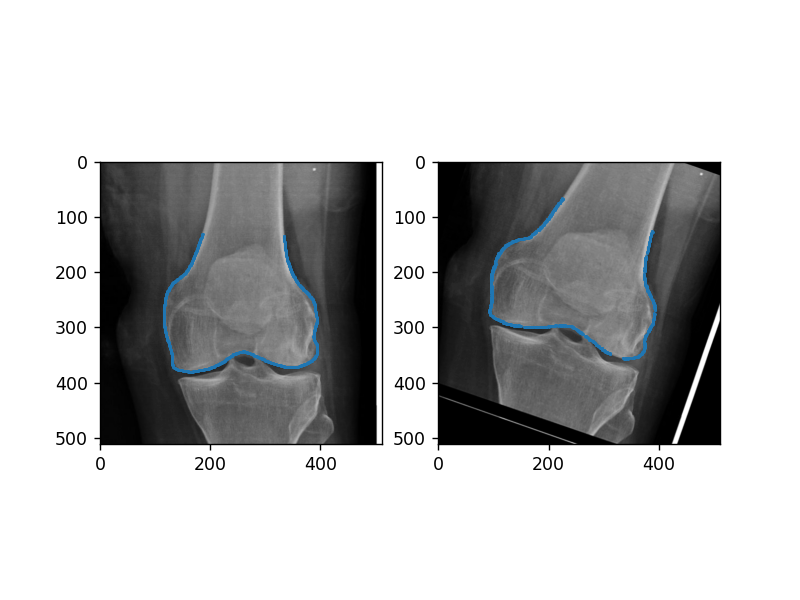

In [271]:
index = np.random.randint(0, 105)
image, label, landmarks = read_image(original_set["trainingset"]["images"][index]), np.load(original_set["trainingset"]["labels"][index]), np.loadtxt(original_set["trainingset"]["landmarks"][index])

distort = np.random.uniform(low=0.2, high=0.25)
affine = np.random.uniform(low=4, high=5)
print(index, distort, affine)


GridDistortion = albumentations.GridDistortion(distort_limit=distort, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1) #
ElasticTransform = albumentations.ElasticTransform(sigma=10, alpha_affine=affine, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1)
ShiftScaleRotate = albumentations.ShiftScaleRotate(rotate_limit=20, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1)
RandomBrightnessContrast = albumentations.RandomBrightnessContrast(p=1, always_apply=True)


transforms = albumentations.Compose(randomize_order([GridDistortion, ElasticTransform, ShiftScaleRotate]))


augmented = transforms(image=image, mask=label)
augmented["image"] = RandomBrightnessContrast(image=augmented["image"])["image"]
'''
augmented = GridDistortion(image=image, mask=label)
augmented = ElasticTransform(image=augmented["image"], mask=augmented["mask"])
augmented = ShiftScaleRotate(image=augmented["image"], mask=augmented["mask"])

'''
image_aug , label_aug = augmented["image"], augmented["mask"]

Y_, X_ = np.where(label_aug > 0)
Y, X = np.where(label > 0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image, "gray")
ax1.scatter(X, Y, s=0.5)
ax2.imshow(image_aug, "gray")
ax2.scatter(X_, Y_, s=0.5)
plt.show()

In [7]:
count = 105
mode = "test"
for i in range(70):
    for j in range(10):
        image, label = read_image(original_set[mode+"ingset"]["images"][i]), np.load(original_set[mode+"ingset"]["labels"][i])
        new_image_path = './dataset/'+mode+'/images/'+str(count)+'.jpg'
        new_label_path = './dataset/'+mode+'/labels/'+str(count)+'.npy'
        distort = np.random.uniform(low=0.2, high=0.25)
        affine = np.random.uniform(low=4, high=5)
        GridDistortion = albumentations.GridDistortion(distort_limit=distort, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1)
        ElasticTransform = albumentations.ElasticTransform(sigma=10, alpha_affine=affine, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1)
        ShiftScaleRotate = albumentations.ShiftScaleRotate(rotate_limit=20, interpolation=cv2.INTER_CUBIC, border_mode=cv2.BORDER_CONSTANT, p=1)
        RandomBrightnessContrast = albumentations.RandomBrightnessContrast(p=1, always_apply=True)
        transforms = albumentations.Compose(randomize_order([GridDistortion, ElasticTransform, ShiftScaleRotate]))
        augmented = transforms(image=image, mask=label)
        augmented["image"] = RandomBrightnessContrast(image=augmented["image"])["image"]
        cv2.imwrite(new_image_path, augmented["image"])
        np.save(new_label_path, augmented["mask"])
        count +=1

In [8]:
new_set = {
                
                "trainingset":{
                    "images":["./dataset/train/images/"+str(id)+".jpg" for id in range(5355)],
                    "labels":["./dataset/train/labels/"+str(id)+".npy" for id in range(5355)]
                    
                }, 
                "validationset":{
                    "images":["./dataset/test/images/"+str(id)+".jpg" for id in range(70)]+["./dataset//test/images/"+str(id)+".jpg" for id in range(105, 805)],
                    "labels":["./dataset/test/labels/"+str(id)+".npy" for id in range(70)]+["./dataset/test/labels/"+str(id)+".npy" for id in range(105, 805)]
                },
                "testingset":{
                     "images":["./dataset/test/images/"+str(id)+".jpg" for id in range(70, 105)],
                     "labels":["./dataset/test/labels/"+str(id)+".npy" for id in range(70, 105)],
                     "landmarks":["./dataset/test/landmarks/"+str(id)+".txt" for id in range(70, 105)]
                }
            }

In [9]:
pickle.dump(new_set, open("newdataset.p", "wb"))